In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_base = '/Users/emiliebertholet/cernbox/coldbox_data'

In [3]:
!ls /Users/emiliebertholet/cernbox/coldbox_data

adc_data_run_25036_ch_40_all.npy adc_data_run_25068_ch_37_all.npy
adc_data_run_25050_ch_37_all.npy adc_data_run_25071_ch_37_all.npy
adc_data_run_25066_ch_40_all.npy adc_data_run_25087_ch_37_all.npy


In [4]:
filename = f'{folder_base}/adc_data_run_25036_ch_40_all.npy'
data = np.load(filename, allow_pickle=True).astype(np.int16)
data.shape
# (16600, 65536): 16600 = "lines"; 65536 = "columns"

(16600, 65536)

In [5]:
def fast_plot(data):
    fig, axs = plt.subplots(1, 1, figsize=(12, 2))
    axs.plot(data.transpose())
    axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

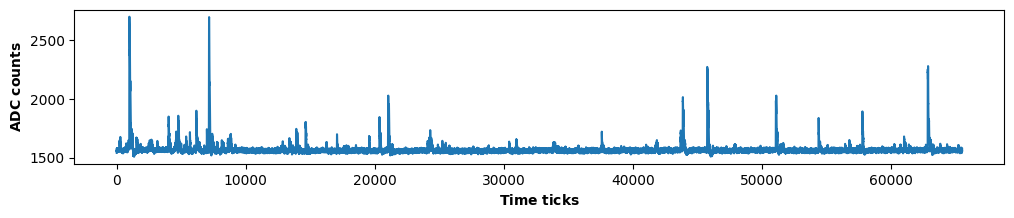

In [6]:
fast_plot(data[9:10])

## Toy: pedestal subraction

In [7]:
def substract_peds(row):
    return row - np.argmax(np.bincount(row))

In [8]:
toy = np.array([[1, 2, 4, 4], [5, 2, 7, 2]])
print(toy.shape) 

(2, 4)


#### bitcount

take an array and counts the occurrences of each integer value in the array

returns the counts

example: it returns [0, 2, 0, 1]

it means: 
- there is no 0 in the input array 
- there are 2 times 1 the input array 
- there is no 2 in the input array 
- there is 1 times 3 the input array 

input can be [2,2,3], [2,3,2] etc.

In [9]:
row = np.array([1,2,3,5,3,2])
np.bincount(row) 

array([0, 1, 2, 2, 0, 1])

In [10]:
row = np.array([1,2,3,4,3])
np.argmax(np.bincount(row)) #returns the value of the most populated bin

np.int64(3)

In [11]:
toy_sub = []
for row in toy:
    print(row)
    row = substract_peds(row)
    toy_sub.append(row)
    print(row)
    print()
toy_sub = np.array(toy_sub)

[1 2 4 4]
[-3 -2  0  0]

[5 2 7 2]
[3 0 5 0]



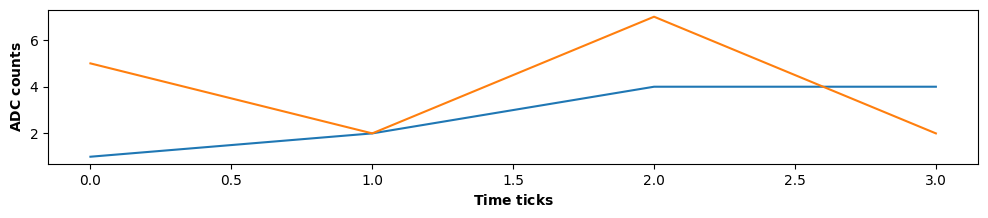

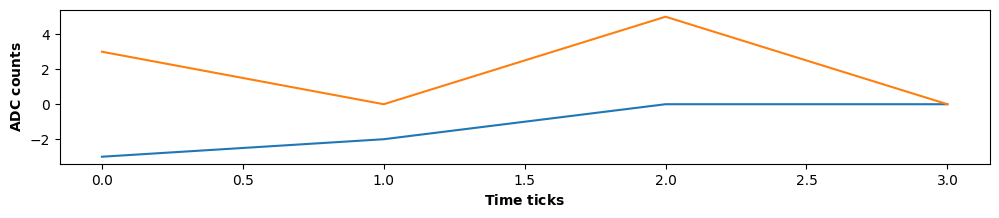

In [12]:
fast_plot(toy)
fast_plot(toy_sub)


[1502 1502 1509 1505 1497 1500 1510 1501 1488 1490 1508 1505 1492 1499]
[ -2  -2   5   1  -7  -4   6  -3 -16 -14   4   1 -12  -5]

[1529 1538 1556 1558 1558 1557 1548 1540 1549 1560 1560 1561 1553 1548]
[-98 -89 -71 -69 -69 -70 -79 -87 -78 -67 -67 -66 -74 -79]



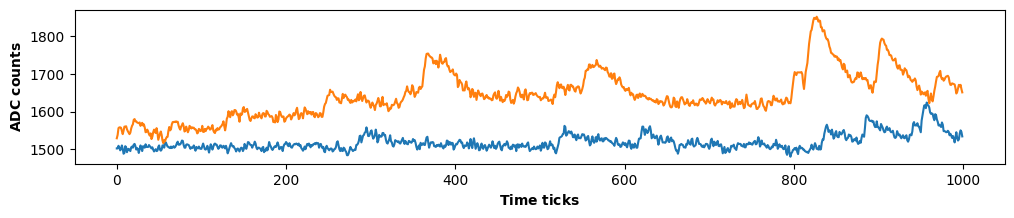

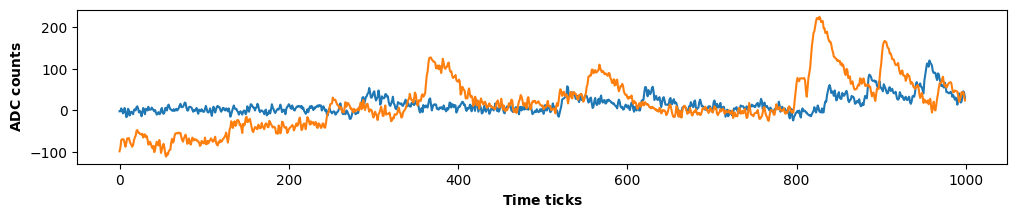

In [13]:
data_toy = data[0:2, 0:1000]
data_toy_sub = []
for row in data_toy:
    print(row[0:14])
    row = substract_peds(row)
    data_toy_sub.append(row)
    print(row[0:14])
    print()
data_toy_sub = np.array(data_toy_sub)

fast_plot(data_toy)
fast_plot(data_toy_sub)

# Pedestal subratction: study

In [14]:
def substract_peds_study(row):
    pedestal = np.argmax(np.bincount(row))
    return row - np.argmax(np.bincount(row)), pedestal

In [15]:
# start with one row
row = data[0]
splits = np.arange(1, 200, 1)
info = {}
for n in splits:
    splited_rows = np.array_split(row, n)
    peds, entries = [], []
    for split in splited_rows:
        row_sub, pedestal = substract_peds_study(split)
        peds.append(pedestal)
        entries.append(len(split))
    info[f'{n}_pedestals'] = np.array(peds)
    info[f'{n}_entries']   = np.array(entries)

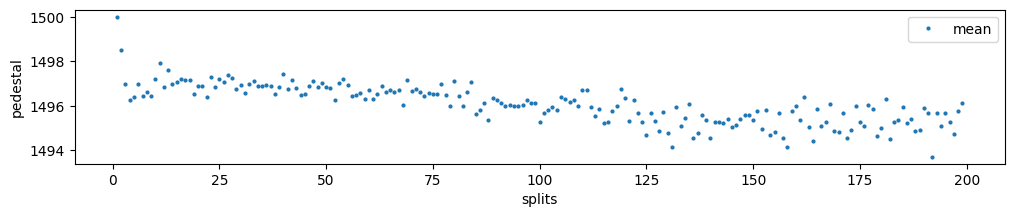

In [19]:
nEntries, means, stds, min, max = [], [], [], [], []
for s in splits:
    nEntries.append(info[f'{s}_entries'][0])
    means.append(info[f'{s}_pedestals'].mean())
    stds.append(info[f'{s}_pedestals'].std())
    min.append(info[f'{s}_pedestals'].min())
    max.append(info[f'{s}_pedestals'].max())



fig, axs = plt.subplots(1, 1, figsize=(12, 2))
# axs.plot(splits, min, 'o', markersize=2, label='min');
# axs.plot(splits, max, 'o', markersize=2, label='max');
axs.plot(splits, means, 'o', markersize=2, label='mean');
axs.legend();
axs.set_xlabel(r"splits")
axs.set_ylabel(r"pedestal");

no split:  65536 entries per split
max splits:  330 entries per split


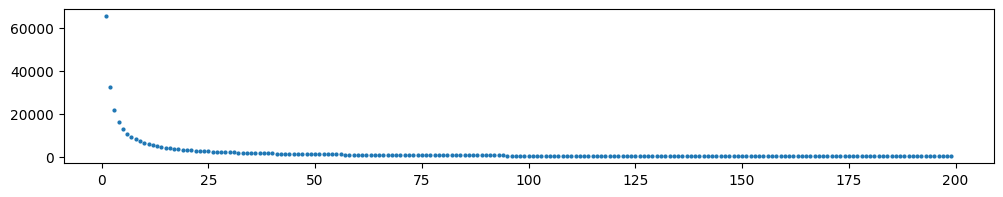

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
axs.plot(splits, nEntries, 'o', markersize=2);
print('no split: ', info['1_entries'][0], 'entries per split')
print('max splits: ', info[f'{splits[-1]}_entries'][0], 'entries per split')

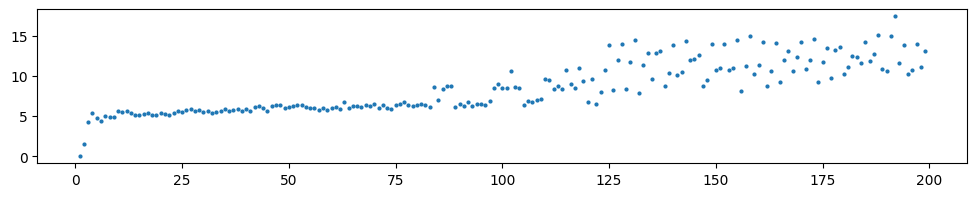

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
axs.plot(splits, stds, 'o', markersize=2);